In [7]:
import csv
import pandas as pd
import string
# import requests
from xml.dom import minidom
import nltk
from bs4 import BeautifulSoup
from pathlib import Path
dataset_dir = Path.cwd() / 'datasets/stackexchange'

In [2]:
import xml.etree.ElementTree as ET

def xml2df(path):
    tree = ET.parse(path)
    root = tree.getroot()
    data=[]
    for child in root:
        #print(child.attrib)
        #df = pd.Series(child.attrib).to_frame()
        data.append(child.attrib)
    df = pd.DataFrame(data)
    return df

In [ ]:
# Posts.xml 
# PostTypeId = 1 Qeustion, Id: QuestionId, Tags: Category, OwnerUserId: AskerId(UserId), Tags: Category,
# PostTypeId = 2 Answer, Id: AnswerId, ParentId： QuestionId, Score: Helpfulness, CreationDate: Timestamp, 
# OwnerUserId: AnswererId(UserId)
# Users.xml Reputation: Reputation, DsiplayName: Username, Id: UserId
# Tags.xml TagName: Category

In [ ]:
from pathlib import Path
abs_data_dir = Path.cwd() / 'csv_files/stackexchange/content'
# data_dir = Path.home() / 'GenderPerformance/datasets/yelp'
dataset_dir = Path.cwd() / 'csv_files/stackexchange'


def create_data(category):
    df_post= xml2df(abs_data_dir / 'Posts.xml')
    df_user= xml2df(abs_data_dir / 'Users.xml')
    
    print("Posts: ",df_post.shape)
    df_post = df_post[['OwnerUserId', 'Body', 'PostTypeId', 'CreationDate', 'Score']]
    df_post = df_post[df_post['PostTypeId'].apply(lambda x: x == '2')]
    df_post.rename(columns={'OwnerUserId': 'UserId'}, inplace=True)

    print("Users: ", df_user.shape)
    df_user = df_user[['Id', 'DisplayName', 'Reputation']]
    df_user.rename(columns={'Id': 'UserId'}, inplace=True)
    data = pd.merge(df_post, df_user, on='UserId', how='left')
    data.dropna(inplace=True)
    print("Combined frame shape", data.shape)
#     data.drop(['UserId'], axis=1, inplace=True)
    data.rename(columns={'DisplayName':'Name', 'Body': 'AnswerText'}, inplace=True)
#     data = data.reindex(columns=['Name', 'AnswerText'])

    data['AnswerText'] = data['AnswerText'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().replace('|', '').lower())
    data['AnswerText'] = data['AnswerText'].apply(lambda x: " ".join(x.split()))
#     soup = BeautifulSoup(data.at[0,'Post'], 'html.parser')
#     print(soup.get_text())
    data.to_csv(dataset_dir /  (category + ".csv"), sep='|', encoding='utf-8', header=False, index=False, na_rep=string)
    print("Write complete for post: ", category)
    return data

In [11]:
from pathlib import Path

dataset_dir = Path.cwd() / 'datasets/stackexchange'


# def create_data(category):
df_comments = xml2df(dataset_dir / 'Comments.xml')
df_users = xml2df(dataset_dir / 'Users.xml')

print("Posts: ",df_comments.shape)
df_comments = df_comments[['UserId', 'Text', 'CreationDate', 'Score']]

print("Users: ", df_users.shape)
df_users = df_users[['Id', 'DisplayName', 'Reputation']]
df_users.rename(columns={'Id': 'UserId', 'DisplayName': 'UserName'}, inplace=True)
merged_df = pd.merge(df_comments, df_users, on='UserId', how='left')
merged_df.dropna(inplace=True)
print("Combined frame shape", merged_df.shape)


# merged_df['Text'] = merged_df['Text'].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text().replace('|', '').lower())
# merged_df['Text'] = merged_df['Text'].apply(lambda x: " ".join(x.split()))

merged_df.to_csv(dataset_dir /  "stackoverflow_full_dataset.csv", sep='|', encoding='utf-8', header=False, index=False, na_rep=string)
print("Write complete for post: ", category)


Posts:  (74428966, 7)
Users:  (10932295, 13)
Combined frame shape (73242149, 6)


/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://en.wikipedia.org/wiki/Typing_of_the_Dead" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://search.cpan.org/search?query=bot&mode=all" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://perldoc.perl.org/perlfaq4.html#How-can-I-remove-duplicate-elements-from-a-list-or-array%3F" looks like a URL. Beautiful Soup is not

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.odbms.org" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.mono-project.com/Main_Page" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.gamedev.net/community/forums/topic.asp?topic_id=509479&whichpage=1&#3320937" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP 

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.microsoft.com/whdc/devtools/debugging/default.mspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.jargon.net/jargonfile/h/heisenbug.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://msdn.microsoft.com/en-us/library/ms997507.aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should p

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.codeproject.com/KB/architecture/NHibernateBestPractices.aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/321618/where-can-i-ask-questions-that-arent-programming-questions" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.mysqlperformanceblog.com/2006/11/12/are-php-persist

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://download.microsoft.com/download/3/8/8/388e7205-bc10-4226-b2a8-75351c669b09/csharp%20language%20specification.doc" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.ozoneasylum.com/search?subsearchID=7808&subsearchType=0&inputFulltextSearchWord=20+liner&inputSearchOnly=true" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarn

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://sbinfocanada.about.com/od/accountin1/tp/accountsoft.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/392470/passing-value-to-javascript-from-php
duplicate." looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "https://developer.mozilla.org/En/Browser_Detection_and_Cross_Browser_Support" look

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.gleamtech.com/products/filevista-control.asp" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/461255/things-possible-in-eclipse-that-arent-possible-in-intellij" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/311242/php-open-another-webpage-with-post-d

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/437250/friend-scope-in-c/437507" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://learn.adobe.com/wiki/display/Flex/Flex+and+Java" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.google.com/search?q=javascript+rich+text+input" looks like a URL. Beautiful Soup is not an HTTP client

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.reverseshot.com/files/images/pre-issue22/texas-chainsaw-massacre_28.preview.jpg" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://blog.libssh2.org/index.php?/archives/28-How-long-is-a-piece-of-string.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://msmvps.com/blogs/luisabreu/archive/2007/09/06/c-overloa

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://geeklit.blogspot.com/2006/08/calling-c-lib-from-c.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/509129/why-do-arrays-start-from-zero/509142" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/577632/validating-and-submitting-a-form-using-javascript-aj

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/505793/do-seo-friendly-urls-really-affect-a-pages-ranking" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://msdn.microsoft.com/en-us/library/ms228628(VS.80).aspx
http://msdn.microsoft.com/en-us/library/t2yzs44b(VS.80).aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://en.wikipedia.

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.uservoice.com/pages/general/suggestions/138261-allow-a-per-tag-home-faq-page" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/575511/what-c-open-source-projects-have-good-and-clean-code-to-learn-from
http://stackoverflow.com/questions/534311/examples-of-modern-c-in-action" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://msdn.microsoft.com/en-us/library/cc966541.aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/154630/recommended-gcc-warning-options-for-c" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://merd.sourceforge.net/pixel/language-study/syntax-across-languages.html#Strng" looks like a URL

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://en.wikipedia.org/wiki/Fuzzy_string_searching" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/673654/when-is-it-okay-to-check-if-a-file-exists" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/696455/how-to-stop-gridview-column-from-automatically-encoding-h

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://shootout.alioth.debian.org/gp4/benchmark.php?test=all&lang=all" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/128434/what-are-community-wiki-posts-in-stackoverflow" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.cjcraft.com/blog/" looks like a URL. Beautiful Soup is not an HTT

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www2.smarttech.com/st/en-US/Products/SynchronEyes+Classroom+Management+Software/default.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://msdn.microsoft.com/en-us/library/cc903962(VS.95).aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/541236/how-can-i-speed-up-jquery-selecte

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/464876/sending-an-email-with-the-header-return-path-using-windows-virtual-mail-server/480381#480381" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.tablix.org/~avian/blog/archives/2009/03/wordpress_is_a_bad_joke/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/865423/optimized-implementations-of-java-util-map-and-java-util-set/865449#865449" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://groups.google.com/group/away3d-dev/browse_thread/thread/d9c029574b9e16d0" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/865

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://weblogs.asp.net/scottgu/archive/2008/01/07/dynamic-linq-part-1-using-the-linq-dynamic-query-library.aspx" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/521298/when-to-use-struct-in-c" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/682438/hash-function-p

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/934647/why-do-none-of-my-actionfilters-run" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.databaseanswers.org/data_models/auction/index.htm" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://blog.tmcnet.com/blog/robert-hashemian/google-toolbar-exposing-hidden-web-pages.html" look

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.domain.com/download/fake.exe?/home/virtual/site1/fst/var/www/html/download/fake.exe" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://perl.apache.org/docs/2.0/os/win32/install.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/search?q=nhibernate+generate+mapping" looks like a URL. Beaut

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://ondras.zarovi.cz/sql/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/717222/spellcheck-components-for-delphi" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.innovatingtomorrow.net/2008/04/30/preloading-content-jquery" looks like a URL. Beautiful Soup is not an HTTP client. You

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/70324/java-inner-class-and-static-nested-class" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/893913/should-i-store-generated-code-in-source-control" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/1034429/how-to-prevent-memor

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/308963/how-to-split-oracle-sql-statements-for-ado-net" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://xkcd.com/327/" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.daniweb.com/forums/thread97463.html" looks like a URL. Beautiful Soup is not an HTTP client. You should probably u

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/225802/how-to-determine-which-process-is-holding-a-file-in-windows" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://download.oracle.com/docs/cd/B19306_01/server.102/b14220/datatype.htm#i16209" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/1024651/do-i-ha

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://github.com/subsonic/SubSonic-3.0/issues#issue/37" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://en.wikipedia.org/wiki/VList" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://docs.python.org/whatsnew/2.4.html#pep-318-decorators-for-functions-and-methods" looks like a URL. Beautiful Soup is not an HTTP client. Y

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://code.djangoproject.com/ticket/10650" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/1036612/how-to-make-a-sleep-in-javascript" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/search?q=uml+book" looks like a URL. Beautiful Soup is not an HTTP client. You should prob

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/1049112/what-is-the-in-jquery/1050433#1050433" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.techonthenet.com/excel/formulas/index_vba.php" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://dilbertblog.typepad.com/the_dilbert_blog/2007/07/subjective-humo.html" looks like a URL. B

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://stackoverflow.com/questions/129677/whats-the-best-method-for-sanitizing-user-input-with-php/130323#130323" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.microsoft.com/downloads/details.aspx?FamilyID=88AD7E7C-4068-48B8-9503-E160A6693BBA&displaylang=en" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/bs4/__init__.py:375: UserWarning: "http://www.wi

TypeError: cannot unpack non-iterable NoneType object

In [38]:
merged_df.to_csv(dataset_dir /  "stackoverflow_full_dataset.csv", sep='|', encoding='utf-8', index=False, na_rep=string)

In [13]:
# df = create_data('stackoverflow_full_dataset')
merged_sampled_df = merged_df.sample(6000000)

In [14]:
merged_sampled_df.to_csv(dataset_dir /  "stackoverflow_sampled_dataset.csv", sep='|', encoding='utf-8', index=False, na_rep=string)

In [17]:
merged_sampled_df = merged_sampled_df.reset_index(drop=True)

In [ ]:
#UnicodeEncodeError: 'utf-8' codec can't encode character '\udbff' in position 789: surrogates not allowed

In [ ]:
def cleanser(text):
    post = ''
    try:
        post = text.encode("utf-8")
    except UnicodeEncodeError as e:
        if e.reason == 'surrogates not allowed':
            post =  text.encode('utf-8', "backslashreplace").decode('utf-8')
    
    return post

In [ ]:
df['AnswerText'] = df['AnswerText'].apply(lambda x: cleanser(x))

In [ ]:
df.shape

In [ ]:
df.to_csv(dataset_dir / 'so_train_full_data.csv' , sep='|', header=False, index=False, na_rep=string)

In [ ]:
def clean(text):
    post =''
    try:
        post = text.decode('utf-8')
    except AttributeError:
        post =  text
    return post

In [ ]:
df['AnswerText'] = df['AnswerText'].apply(lambda x: clean(x))

In [ ]:
df.head()

In [ ]:
df.to_csv(dataset_dir / 'so_train_full_data.csv', sep='|', encoding='utf-8', header=False, index=False, na_rep=string)

In [ ]:
df.shape

# gender guesser 

In [9]:
df = pd.read_csv(dataset_dir / 'stackoverflow_sampled_dataset.csv', sep='|', encoding='utf8', name=[]'UserId', 'Text', 'CreationDate', 'Score', 'UserName', 'Reputation'])
df = pd.read_csv(dataset_dir / 'stackoverflow_full_dataset.csv', sep='|', encoding='utf8', )

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
df.columns 

Index(['UserId', 'Text', 'CreationDate', 'Score', 'UserName', 'Reputation'], dtype='object')

In [14]:
df.columns = ['UserId', 'Text', 'CreationDate', 'Score', 'UserName', 'Reputation']

In [18]:
df = merged_sampled_df

In [16]:
import gender_guesser.detector as gender

d = gender.Detector(case_sensitive=False)
translator = str.maketrans('', '', string.punctuation)

def get_gender(name):
    try:
        n = name.lower()
        if ('mom' in n) or ('girl' in n) or ('angel' in n) or ('mum' in n) or ('mother' in n) or ('woman' in n):
            return 'female'
        if ('boy' in n) or ('dude' in n):
            return 'male'
        temp = name.translate(translator).split()
    except:
        return 'unknown'
    
    if len(temp)>0:
        first_name = temp[0]
        first_name = ''.join([i for i in first_name if not i.isdigit()])
        gender = d.get_gender(first_name,'usa')
        if(gender=='unknown'):
            first_name= first_name[:-1]
            gender = d.get_gender(first_name,'usa')
        return gender
    else:
        return 'unknown'

In [17]:
df['Gender'] = df['UserName'].apply(lambda x:get_gender(x))

In [24]:
df.Gender.value_counts()

unknown          3195401
andy             1314742
male             1188200
mostly_male       188087
female             80639
mostly_female      32931
Name: Gender, dtype: int64

In [25]:
df.head()

,index,UserId,Text,CreationDate,Score,UserName,Reputation,Gender
0,35246416,3588235,@Felype try{}catch{} return: The program '[344...,2015-05-01T15:50:08.187,0,user3588235,83,unknown
1,47484591,4125191,Are you sure it has anything to do with your h...,2016-08-17T14:16:48.193,0,RealSkeptic,29074,unknown
2,4022680,520942,@WulfgarPro: Glad to help! Will provided an ex...,2011-02-08T01:43:42.450,0,bitxwise,3079,unknown
3,23993562,1756702,"If you are talking about Clojure, `defrecord` ...",2014-01-28T19:22:05.173,1,A. Webb,24046,unknown
4,65166691,14122,ahh -- this makes much more sense now; `make` ...,2018-09-01T18:08:25.813,0,Charles Duffy,192010,male


In [18]:
# disclosed_flag = df.Gender.isin(['mostly_male', 'male', 'mostly_female', 'female'])
disclosed_flag = df.Gender.isin(['male', 'female'])
undisclosed_flag = ~disclosed_flag

In [19]:
disclosed_gender_df =  df[disclosed_flag]
undisclosed_gender_df = df[undisclosed_flag]

In [29]:
import os.path
import pandas as pd
if not os.path.exists(dataset_dir / 'disclosed_dataset.csv'):
    print('saving disclosed dataset to csv')
    disclosed_gender_df.to_csv(dataset_dir / 'disclosed_dataset.csv', index=False)
else:
    disclosed_gender_df = pd.read_csv(dataset_dir / 'disclosed_dataset.csv')

if not os.path.exists(dataset_dir / 'undisclosed_dataset.csv'):
    print('saving undisclosed dataset to csv')
    undisclosed_gender_df.to_csv(dataset_dir / 'undisclosed_dataset.csv', index=False)
else:
    undisclosed_gender_df = pd.read_csv(dataset_dir / 'undisclosed_dataset.csv')

saving disclosed dataset to csv
saving undisclosed dataset to csv


In [ ]:
dataset_dir = Path.cwd() / 'datasets/stackexchange/'

In [20]:
# mapping = {'female' : 1, 'male' : 0, 'mostly_female': 1, 'mostly_male': 0}
mapping = {'female' : 1, 'male' : 0}
disclosed_dataset_df = disclosed_gender_df[['UserName', 'Text', 'Gender']]
disclosed_dataset_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
disclosed_dataset_df.replace({'Gender': mapping}, inplace=True)

undisclosed_dataset_df = undisclosed_gender_df[['UserName', 'Text', 'Gender']]
undisclosed_dataset_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
# undisclosed_dataset_df.to_csv(dataset_dir / 'undisclosed_id_text_gender.csv', index=False, header=False)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


# plot data distribution

In [21]:
DF_shape = disclosed_dataset_df.loc[disclosed_dataset_df['Gender'] == 1].shape
DM_shape = disclosed_dataset_df.loc[disclosed_dataset_df['Gender'] == 0].shape
UNDIS_shape = undisclosed_dataset_df.shape
total_size = disclosed_dataset_df.shape[0] + UNDIS_shape[0]

In [22]:
total_size = disclosed_dataset_df.shape[0] + UNDIS_shape[0]

In [23]:
print(total_size, disclosed_dataset_df.shape[0], UNDIS_shape[0], DM_shape[0], DF_shape[0])

76471432 15503499 60967933 14517228 986271


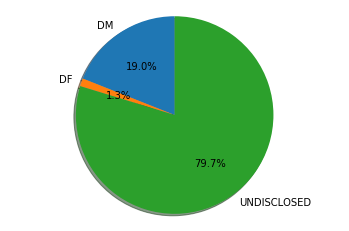

In [25]:
import matplotlib.pyplot as plt
labels = 'DM', 'DF', 'UNDISCLOSED'
sizes = [DM_shape[0]/total_size, DF_shape[0]/total_size, UNDIS_shape[0]/total_size]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

# generate training/test datasets

In [39]:
from sklearn.model_selection import train_test_split

# dataset_df = pd.read_csv('train_dataset.csv')
if 'disclosed_dataset_df' in locals():
    # 80/20 train/test
    train_df, test_df = train_test_split(disclosed_dataset_df, test_size=0.2)
    # 80/20 train/validation
    train_df, validation_df = train_test_split(train_df, test_size=0.2)
else:
    disclosed_dataset_df = pd.read_csv(dataset_dir / 'disclosed_dataset.csv')
    # 80/20 train/test
    train_df, test_df = train_test_split(disclosed_dataset_df, test_size=0.2)
    # 80/20 train/validation
    train_df, validation_df = train_test_split(train_df, test_size=0.2)

In [40]:
# extracting related attributes for training, validation and test
train_gender_text_df = train_df[['Gender', 'Text']]
validation_gender_text_df = validation_df[['Gender', 'Text']]
test_name_text_gender_df = test_df[['UserName', 'Text', 'Gender']]

train_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
train_gender_text_df.to_csv(dataset_dir / 'training_gender_text.csv', index=False, header=False)

validation_gender_text_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
validation_gender_text_df.to_csv(dataset_dir / 'validation_gender_text.csv', index=False, header=False)

test_name_text_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
test_name_text_gender_df.to_csv(dataset_dir / 'test_name_text_gender.csv', index=False, header=False)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [41]:
import pandas as pd
undisclosed_dataset_df = pd.read_csv(dataset_dir / 'undisclosed_dataset.csv')
undisclosed_dataset_df.head()

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,index,UserId,Text,CreationDate,Score,UserName,Reputation,Gender
0,35246416,3588235,@Felype try{}catch{} return: The program '[344...,2015-05-01T15:50:08.187,0.0,user3588235,83.0,unknown
1,47484591,4125191,Are you sure it has anything to do with your h...,2016-08-17T14:16:48.193,0.0,RealSkeptic,29074.0,unknown
2,4022680,520942,@WulfgarPro: Glad to help! Will provided an ex...,2011-02-08T01:43:42.450,0.0,bitxwise,3079.0,unknown
3,23993562,1756702,"If you are talking about Clojure, `defrecord` ...",2014-01-28T19:22:05.173,1.0,A. Webb,24046.0,unknown
4,20847127,1003142,"Well...the parameter is completely redundant, ...",2013-09-22T22:57:46.910,0.0,Konstantin Yovkov,54213.0,andy


In [42]:
undisclosed_gender_df = undisclosed_dataset_df[['UserId', 'Text', 'Gender']]
undisclosed_gender_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
undisclosed_gender_df.to_csv(dataset_dir / 'undisclosed_id_text_gender.csv', index=False, header=False)

In [ ]:
undisclosed_dataset_df.head()

# plot data distribution

In [27]:
sampled_df = pd.read_csv(dataset_dir / 'stackoverflow_sampled_dataset.csv', sep='|', encoding='utf8', names=['UserId', 'Text', 'CreationDate', 'Score', 'UserName', 'Reputation'])

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [29]:
sampled_df['Gender'] = sampled_df['UserName'].apply(lambda x:get_gender(x))

In [41]:
sampled_df.shape

(6936826, 7)

In [30]:
disclosed_flag = sampled_df.Gender.isin(['male', 'female'])
undisclosed_flag = ~disclosed_flag

In [31]:
disclosed_gender_sampled_df =  sampled_df[disclosed_flag]
undisclosed_gender_sampled_df = sampled_df[undisclosed_flag]

In [32]:
mapping = {'female' : 1, 'male' : 0}
disclosed_dataset_sampled_df = disclosed_gender_sampled_df[['UserName', 'Text', 'Gender']]
disclosed_dataset_sampled_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
disclosed_dataset_sampled_df.replace({'Gender': mapping}, inplace=True)

undisclosed_dataset_sampled_df = undisclosed_gender_sampled_df[['UserName', 'Text', 'Gender']]
undisclosed_dataset_sampled_df.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)

/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)
/home/yafei/anaconda3/envs/ma/lib/python3.7/site-packages/pandas/core/generic.py:6517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  regex=regex)


In [37]:
DF_shape = disclosed_dataset_sampled_df.loc[disclosed_dataset_sampled_df['Gender'] == 1].shape
DM_shape = disclosed_dataset_sampled_df.loc[disclosed_dataset_sampled_df['Gender'] == 0].shape
UNDIS_shape = undisclosed_dataset_sampled_df.shape

In [38]:
total_size = disclosed_gender_sampled_df.shape[0] + UNDIS_shape[0]

In [39]:
print(total_size, disclosed_gender_sampled_df.shape[0], UNDIS_shape[0], DM_shape[0], DF_shape[0])

6936826 1268680 5668146 1188200 80480


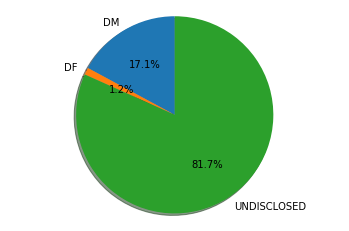

In [40]:
import matplotlib.pyplot as plt
labels = 'DM', 'DF', 'UNDISCLOSED'
sizes = [DM_shape[0]/total_size, DF_shape[0]/total_size, UNDIS_shape[0]/total_size]
explode = (0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()